In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('titanic.csv') #load data-set

In [6]:
df.shape #number of rows and column

(891, 12)

In [7]:
df.shape[0] #number of rows

891

In [8]:
df.shape[1] #number of columns

12

In [9]:
df.dtypes  #datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#Convert all columns to numeric types (ignore errors for non-numeric values)
df = df.apply(pd.to_numeric, errors='ignore')

In [11]:
#check for non-numeric values in each column
non_numeric_columns = df.apply(lambda x: pd.to_numeric(x,errors = 'coerce')).isnull().sum()
#display columns with non numeric values
non_numeric_columns[non_numeric_columns > 0]

Name        891
Sex         891
Age         177
Ticket      230
Cabin       891
Embarked    891
dtype: int64

In [12]:
#Input missing values in the 'Age' column with the mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.dropna(inplace=True) #remove rows with missing values

In [14]:
summary_stats = df.describe()
summary_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.112392,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,14.988475,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [15]:
numeric_df = df.select_dtypes(include='number') #excludes non numeric columns

In [18]:
mean_values = numeric_df.mean() #mean value of the numerical data
mean_values

PassengerId    455.495050
Survived         0.663366
Pclass           1.198020
Age             35.112392
SibSp            0.445545
Parch            0.440594
Fare            76.103301
dtype: float64

In [17]:
median_values = numeric_df.median() #median value of the numerical data
median_values

PassengerId    457.5
Survived         1.0
Pclass           1.0
Age             33.5
SibSp            0.0
Parch            0.0
Fare            55.0
dtype: float64

In [22]:
#mode calculation
#In case there are multiple modes, this selects the first one
mode_values = numeric_df.mode().iloc[0] #mode value of the numerical data
mode_values

PassengerId     2.000000
Survived        1.000000
Pclass          1.000000
Age            29.699118
SibSp           0.000000
Parch           0.000000
Fare           26.550000
Name: 0, dtype: float64

In [20]:
range_values = numeric_df.max() - numeric_df.min() #range values of the numerical data
range_values

PassengerId    888.0000
Survived         1.0000
Pclass           2.0000
Age             79.0800
SibSp            3.0000
Parch            4.0000
Fare           512.3292
dtype: float64

In [21]:
std_deviation = numeric_df.std() #standard deviation of the numerical data
std_deviation

PassengerId    249.704228
Survived         0.473732
Pclass           0.528205
Age             14.988475
SibSp            0.630490
Parch            0.732294
Fare            74.759941
dtype: float64

In [25]:
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    frequency_distribution = df[column].value_counts()
    print(f"Frequency distribution for {column}:\n{frequency_distribution}\n")

Frequency distribution for Name:
Name
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Kimball, Mr. Edwin Nelson Jr                            1
Flynn, Mr. John Irwin ("Irving")                        1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
                                                       ..
Young, Miss. Marie Grice                                1
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Behr, Mr. Karl Howell                                   1
Name: count, Length: 202, dtype: int64

Frequency distribution for Sex:
Sex
male      107
female     95
Name: count, dtype: int64

Frequency distribution for Ticket:
Ticket
113760      4
19950       4
PC 17572    3
PC 17582    3
13502       3
           ..
28551       1
36928       1
226593      1
19988       1
111369     

In [27]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for{column}:\n{unique_values}\n")

Unique values forName:
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'McCarthy, Mr. Timothy J'
 'Sandstrom, Miss. Marguerite Rut' 'Bonnell, Miss. Elizabeth'
 'Beesley, Mr. Lawrence' 'Sloper, Mr. William Thompson'
 'Fortune, Mr. Charles Alexander'
 'Spencer, Mrs. William Augustus (Marie Eugenie)'
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)'
 'Ostby, Mr. Engelhart Cornelius' 'Woolner, Mr. Hugh'
 'Harris, Mr. Henry Birkhardt' 'Nye, Mrs. (Elizabeth Ramell)'
 'Moen, Mr. Sigurd Hansen' 'Fortune, Miss. Mabel Helen'
 'Chaffee, Mr. Herbert Fuller' 'Goldschmidt, Mr. George B'
 'Greenfield, Mr. William Bertram' 'White, Mr. Richard Frasar'
 'Porter, Mr. Walter Chamberlain' 'Baxter, Mr. Quigg Edmond'
 'Webber, Miss. Susan' 'White, Mr. Percival Wayland' 'Peter, Miss. Anna'
 'Newsom, Miss. Helen Monypeny' 'Futrelle, Mr. Jacques Heath'
 'Giglio, Mr. Victor' 'Navratil, Mr. Michel ("Louis M Hoffman")'
 'Pears, Mrs. Thomas (Edith Wearne)'
 'Chibnall

In [28]:
import seaborn as sns

In [29]:
#set style for seaborn
sns.set(style="whitegrid")

In [30]:
numeric_columns = df.select_dtypes(include='number').columns

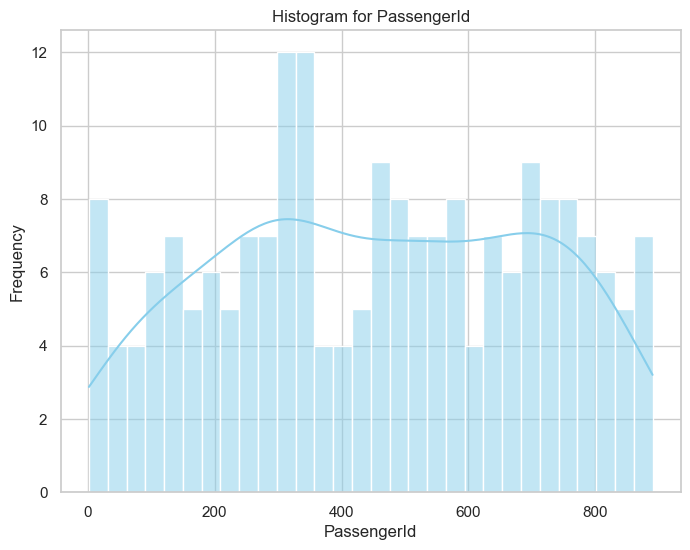

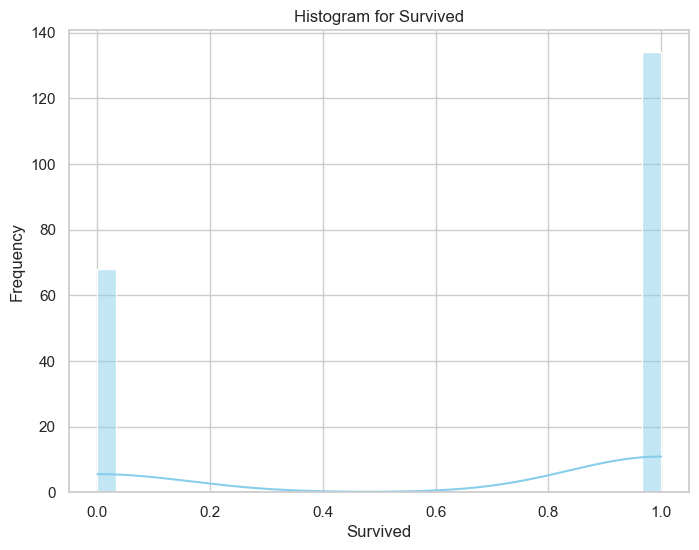

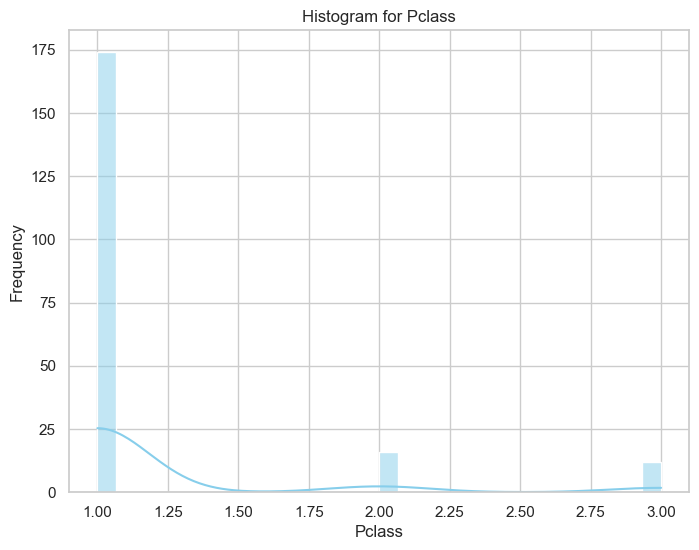

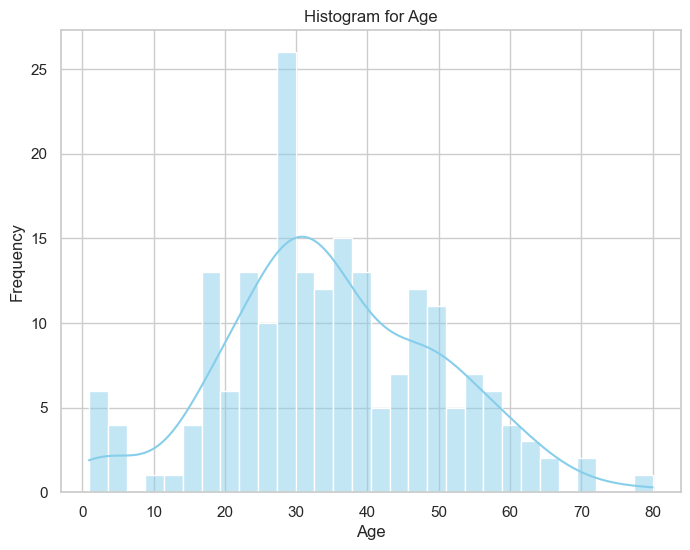

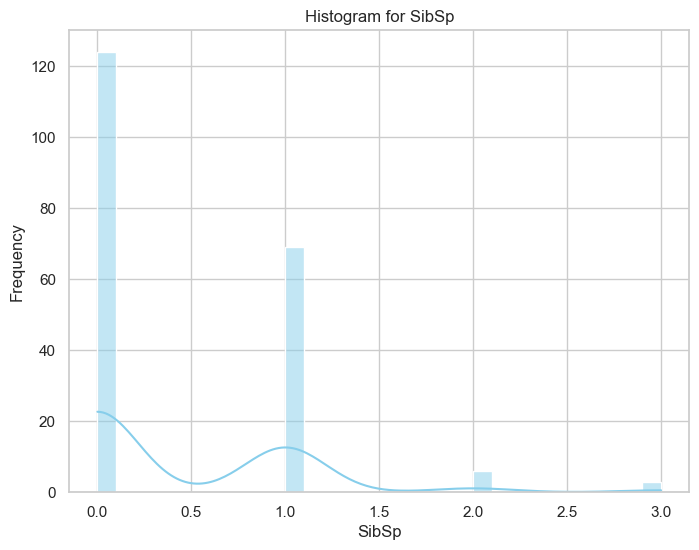

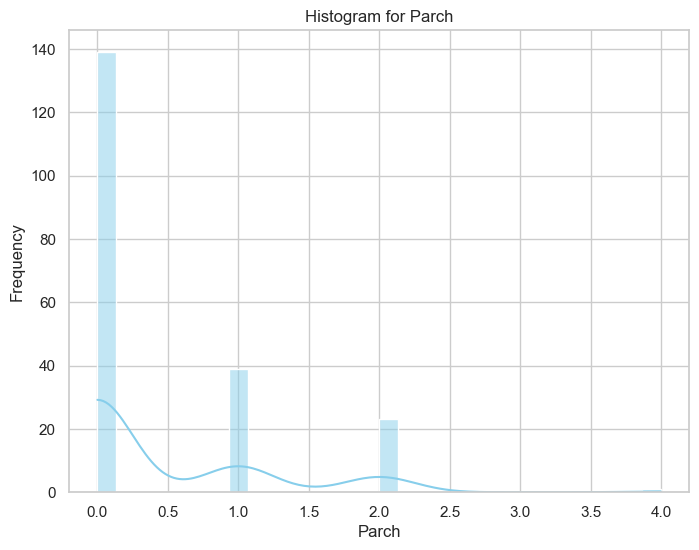

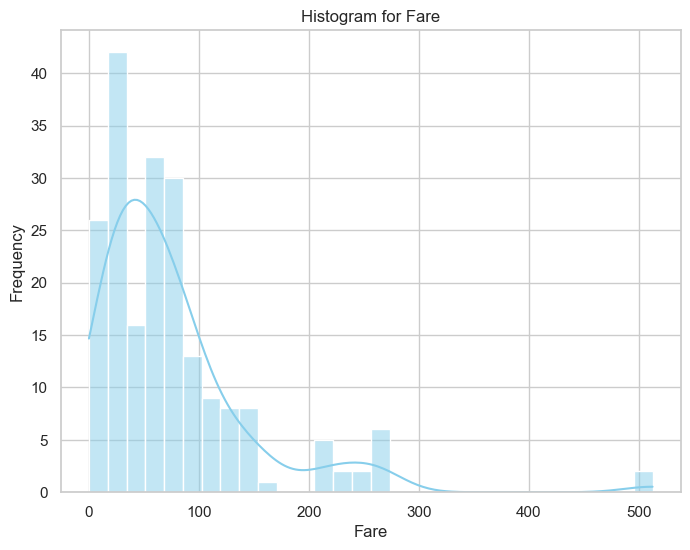

In [34]:
for column in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=column,kde=True,bins=30,color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

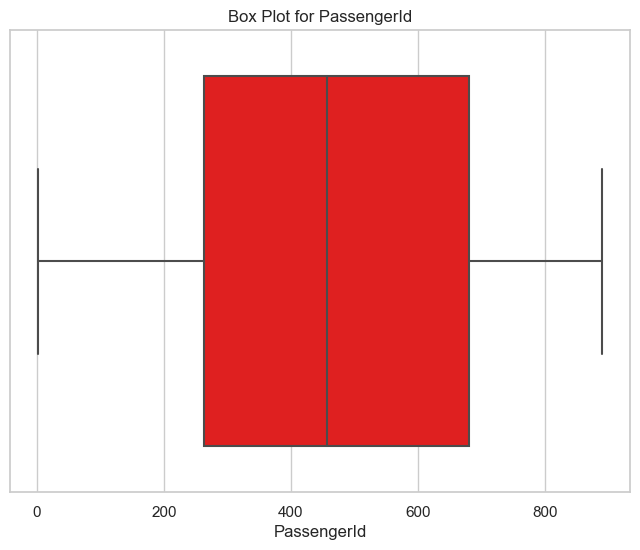

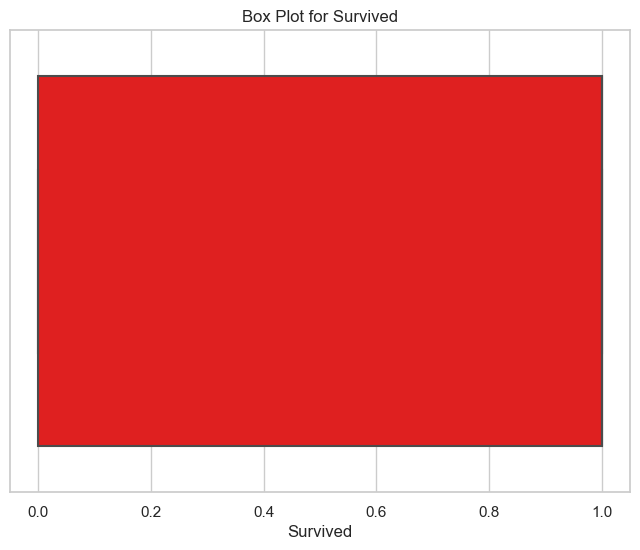

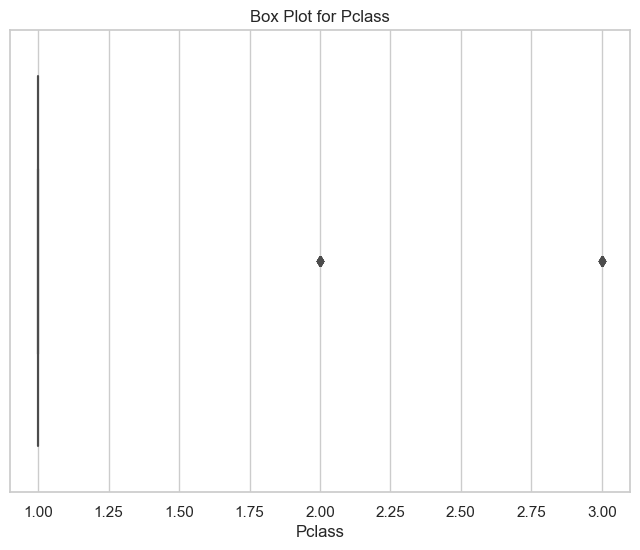

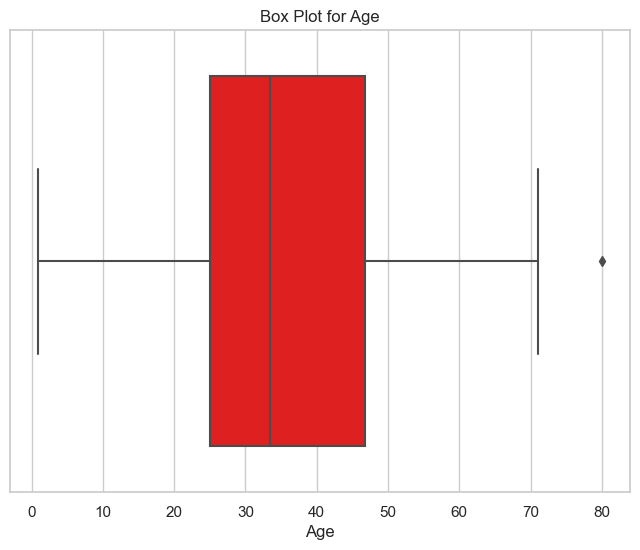

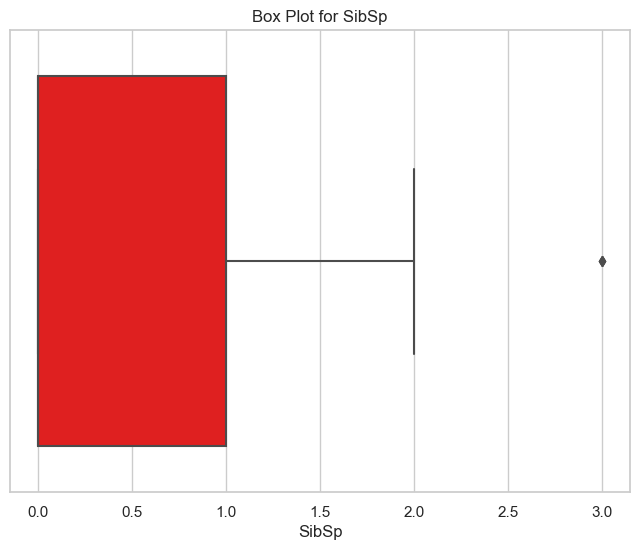

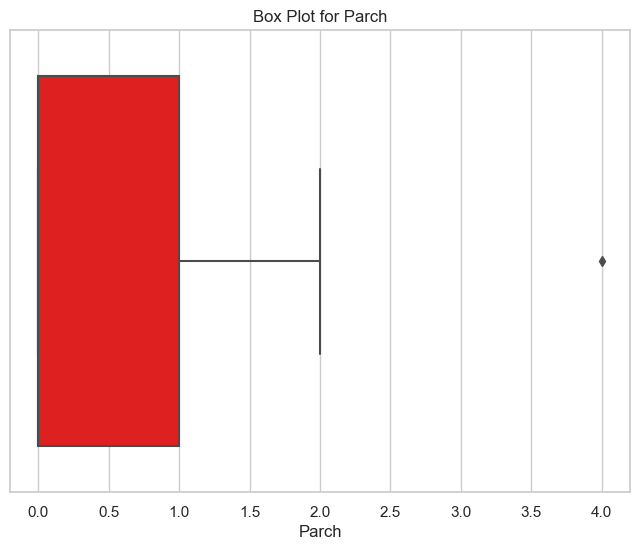

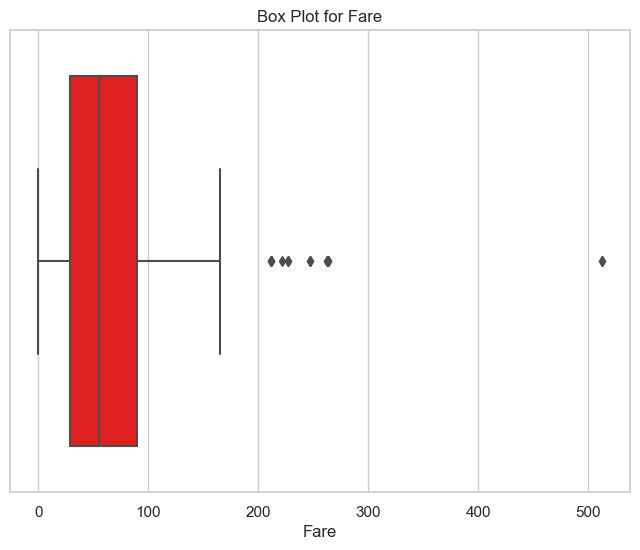

In [37]:
for column in numeric_columns:
    plt.figure(figsize =(8,6))
    sns.boxplot(x=df[column],color='red')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [41]:
from scipy.stats import zscore

In [43]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_df = df[numeric_columns]

In [44]:
z_scores = zscore(numeric_df)
outliers = (abs(z_scores)>3).all(axis=1)

#handle outliers
df_no_outliers = df[~outliers]